In [18]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt

def process_file(file_path):
    head = pd.read_excel(file_path, usecols = 'C', nrows = 5, header = None )
    head.iloc[:,0] = head.iloc[:, 0].str.replace(": ", "", regex = False)
    station_id = head.iloc[0,0]  # sebagai teks ID
    station_name = head.iloc[1,0] # sebagai nama 
    latitude = float(head.iloc[2,0]) # sebagai lintang
    longitude = float(head.iloc[3,0]) # sebagai bujur
    elevation = float(head.iloc[4,0]) # sebagai elevasi

    data = pd.read_excel(file_path, usecols = "A:K", skiprows = 8)
    
    keterangan_index = data[data.iloc[:, 0].str.contains("Keterangan :", na=False)].index
    if not keterangan_index.empty:
        last_row_index = keterangan_index[0] - 4
        relevant_data = data.loc[:last_row_index]
    else:
        relevant_data = data 
    
    data_transposed = relevant_data.T

    headers = data_transposed.iloc[0].values

    tavg_data = data_transposed.iloc[3].values

    tavg_df = pd.DataFrame([tavg_data], columns = headers)

    return tavg_df


file_pattern = 'data/laporan_iklim_harian*.xlsx'
files = glob.glob(file_pattern)

all_data = []

for file in files:
    df = process_file(file)
    all_data.append(df)

final_combined_data = pd.concat(all_data, ignore_index = True)

print(final_combined_data)


    01-06-2024  02-06-2024  03-06-2024  04-06-2024  05-06-2024  06-06-2024  \
0         24.4        25.0        23.9        25.0        25.1        25.5   
1         30.6        30.7        29.2        30.8        31.5        31.5   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3         30.7        30.6        28.8        29.6        31.2        31.8   
4         26.4        27.4        26.3        27.0        27.7        28.2   
5         28.6        29.1        27.7        29.3        29.0        28.7   
6         29.9        29.7        28.7        30.0        30.1        30.5   
7         27.5        28.7        27.4        26.7        27.5        28.8   
8         22.4        22.3        21.5        22.5        22.2        22.6   
9         29.7        29.7        28.8        29.6        30.0        30.7   
10        29.0        28.7        27.3        28.8        28.5        28.9   
11        30.4        30.0        28.2        29.8        30.3  

In [19]:
daily_avg=final_combined_data.mean()

In [20]:
print(daily_avg)

01-06-2024    28.175000
02-06-2024    28.391667
03-06-2024    27.116667
04-06-2024    28.141667
05-06-2024    28.500000
06-06-2024    28.891667
07-06-2024    28.483333
08-06-2024    28.725000
09-06-2024    27.658333
10-06-2024    28.791667
11-06-2024    27.358333
12-06-2024    27.458333
13-06-2024    27.700000
14-06-2024    28.250000
15-06-2024    27.941667
16-06-2024    27.600000
17-06-2024    28.391667
18-06-2024    27.350000
19-06-2024    28.250000
20-06-2024    28.133333
21-06-2024    28.375000
22-06-2024    27.675000
23-06-2024    28.516667
24-06-2024    28.291667
25-06-2024    26.608333
26-06-2024    28.416667
27-06-2024    28.350000
28-06-2024    27.983333
29-06-2024    26.083333
30-06-2024    28.133333
dtype: float64


In [21]:
dates = df.columns[0:]
dates = pd.to_datetime(dates, dayfirst=True)
print(dates)

DatetimeIndex(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16',
               '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', freq=None)


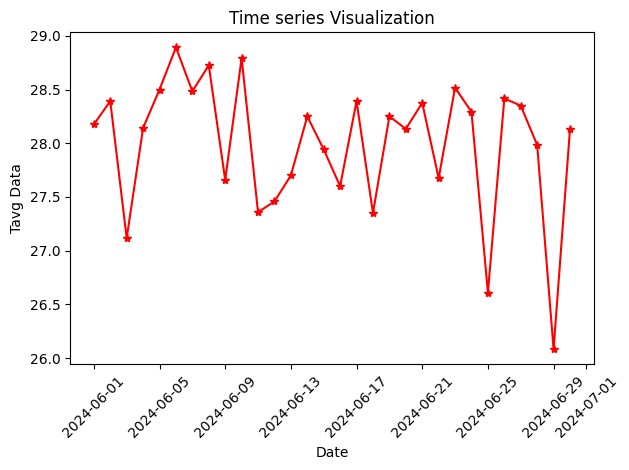

In [26]:
plt.plot(dates, daily_avg, marker = '*', color = 'r')
plt.xticks(rotation = 45)

plt.xlabel("Date")
plt.ylabel('Tavg Data')
plt.title(f'Time series Visualization')
plt.tight_layout()